In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
DATA_PATH = './data/'

In [3]:
os.listdir(DATA_PATH)

['nyra_tracking_table.csv',
 'big-data-derby-2022.zip',
 'nyra_start_table.csv',
 'nyra_2019_complete.csv',
 'nyra_race_table.csv']

#### File descriptions 
File descriptions <br>
nyra_start_table.csv - horse/jockey race data <br>
nyra_race_table.csv - racetrack race data <br>
nyra_tracking_table.csv - tracking data <br>
nyra_2019_complete.csv - combined table of three above files <br>


#### Start table
horse/jockey race data

track_id - 3 character id for the track the race took place at. AQU -Aqueduct, BEL - Belmont, SAR - Saratoga.

race_date - date the race took place. YYYY-MM-DD.

race_number - Number of the race. Passed as 3 characters but can be cast or converted to int for this data set.

program_number - Program number of the horse in the race passed as 3 characters. Should remain 3 characters as it isn't limited to just numbers. Is essentially the unique identifier of the horse in the race.

weight_carried - An integer of the weight carried by the horse in the race.

jockey - Name of the jockey on the horse in the race. 50 character max.

odds - Odds to win the race passed as an integer. Divide by 100 to derive the odds to 1. Example - 1280 would be 12.8-1.

position_at_finish - An integer of the horse's finishing position. (added to the dataset 9/8/22)

In [4]:
start_table = pd.read_csv(DATA_PATH + 'nyra_start_table.csv')

In [37]:
start_table.columns = ['track_id', 'race_date', 'race_id', 'horse_id', 'weight', 'jockey', 'odds', 'position_at_finish']

In [38]:
start_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14914 entries, 0 to 14913
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   track_id            14914 non-null  object
 1   race_date           14914 non-null  object
 2   race_id             14914 non-null  int64 
 3   horse_id            14914 non-null  object
 4   weight              14914 non-null  int64 
 5   jockey              14914 non-null  object
 6   odds                14914 non-null  int64 
 7   position_at_finish  14914 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 932.2+ KB


In [39]:
start_table.head(5)

,track_id,race_date,race_id,horse_id,weight,jockey,odds,position_at_finish
0,AQU,2019-01-01,1,2,120,Junior Alvarado,295,3
1,AQU,2019-01-01,1,3,118,Jose Lezcano,180,4
2,AQU,2019-01-01,1,4,123,Jomar Garcia,1280,5
3,AQU,2019-01-01,1,5,118,Manuel Franco,1150,1
4,AQU,2019-01-01,2,1,121,Jose Lezcano,220,2


In [40]:
start_table.describe().T

,count,mean,std,min,25%,50%,75%,max
race_id,14914.0,5.494502,2.825914,1.0,3.0,6.0,8.0,13.0
weight,14914.0,120.453869,3.522064,110.0,118.0,120.0,122.0,160.0
odds,14914.0,1483.587233,1956.171339,0.0,335.0,730.0,1740.0,19100.0
position_at_finish,14914.0,4.486255,2.569149,1.0,2.0,4.0,6.0,14.0


In [41]:
start_table.nunique()

track_id                3
race_date             217
race_id                13
horse_id               20
weight                 35
jockey                178
odds                  656
position_at_finish     14
dtype: int64

So, now we now, that this dataset inculdes:

- 3 tracks
- 13 races 
    - spread across 217 dates
- 20 horses ids 
    - Does this mean 20 horses in total, or each race resets the horse id, meaning substantially more horses?
- 178 jockeys
- various odds 
- and the fact that there are a max of 14 participants in a race 

Text(0.5, 1.0, 'Distribution of weight carried')

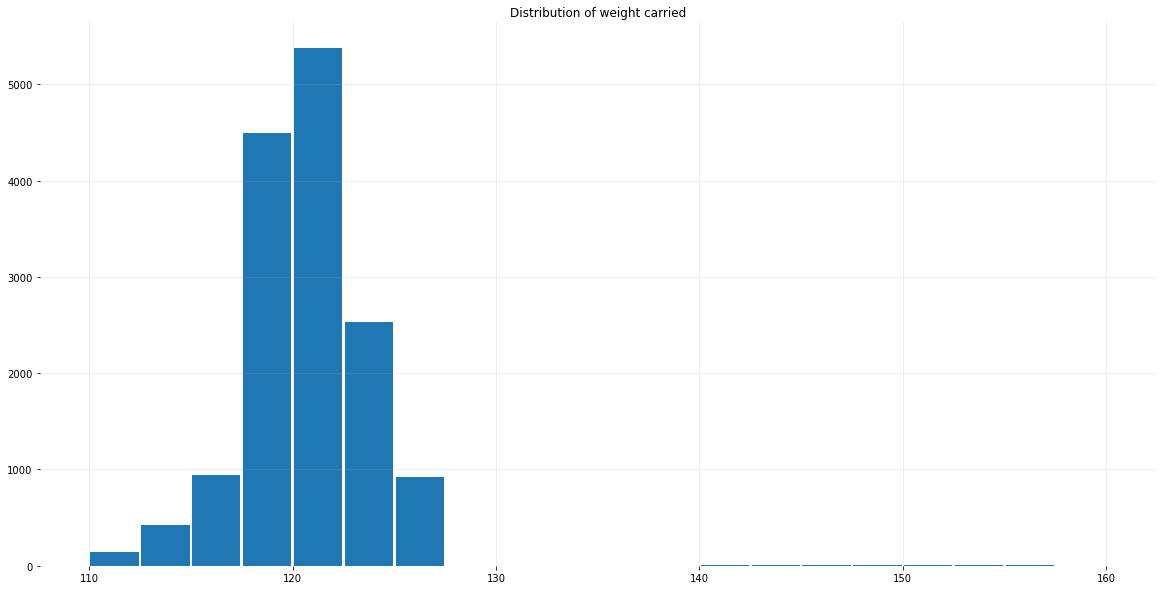

In [42]:
plt.figure(figsize = (20,10))
plt.hist(start_table.weight, rwidth=.95, bins = 20)
plt.grid(alpha = .25)
plt.box(False)
plt.title('Distribution of weight carried')

In [43]:
print(f"First entry: {start_table.race_date.min()}")
print(f"Last entry: {start_table.race_date.max()}")
print(f"Num days: {start_table.race_date.nunique()}")

First entry: 2019-01-01
Last entry: 2019-12-31
Num days: 217


In [52]:
print(f"\nRuns (horse + jockey) per track:\n{start_table.groupby(by =  'track_id').race_date.count()}")



Days count per track:
track_id
AQU    6190
BEL    5539
SAR    3185
Name: race_date, dtype: int64


In [48]:
print(f"\nUnique days per track:\n{start_table.groupby(by =  'track_id').race_date.nunique()}")



Unique days per track:
track_id
AQU    93
BEL    85
SAR    39
Name: race_date, dtype: int64


In [49]:
print(f"\nUnique races per track:\n{start_table.groupby(by =  'track_id').race_id.nunique()}")



Unique races per track:
track_id
AQU    11
BEL    13
SAR    13
Name: race_id, dtype: int64


In [50]:
print(f"\nUnique horses per track:\n{start_table.groupby(by =  'track_id').horse_id.nunique()}")



Unique horses per track:
track_id
AQU    18
BEL    20
SAR    18
Name: horse_id, dtype: int64


In [51]:
print(f"\nUnique jockeys per track:\n{start_table.groupby(by =  'track_id').jockey.nunique()}")


Unique jockeys per track:
track_id
AQU    107
BEL    113
SAR     91
Name: jockey, dtype: int64
